In [1]:
import numpy as np
import matplotlib.pyplot as plt
from spatial_subsampling import get_all_grid_points
import tools.array2image as arr2im 
from matplotlib import animation

In [2]:
### params
# ROI
zmin, zmax = 1888, 2400 # = Nt_offset, Nt, 1865....1895 = only noise ...1865, 2020
xmin, xmax = 240, 350 #267, 297
ymin, ymax = 115, 165 #160
M = zmax - zmin

# Batch
Nx = 10
Ny = 10

# dimension
dx = 0.5 # [mm]
dy = 0.5 # [mm]
dz = 0.036875 # [mm]


In [3]:
# Loading 
path = 'npy_data/batch_itp'

A_true = np.load('{}/A_true.npy'.format(path))
A_smp = np.load('{}/A_smp.npy'.format(path))
A_idw = np.load('{}/A_idw.npy'.format(path))
A_fk = np.load('{}/A_fk.npy'.format(path))


In [4]:
# For a consistent color mapping
vmax = A_true.max()
vmin = A_true.min()

In [5]:
## Scan positions
p_full = get_all_grid_points(Nx, Ny)
p_smp = np.load('{}/p_smp.npy'.format(path))

In [6]:
print(A_true.shape)
print(p_full.shape)
print(A_smp.shape)
print(p_smp.shape)

(512, 10, 10)
(100, 2)
(512, 10, 10)
(15, 2)


In [7]:
boo1, boo2, boo3 = np.meshgrid(np.arange(10), np.arange(20), np.arange(30))
print(boo1.shape)

(20, 10, 30)


In [8]:
stepsize = 2

#xx, yy, zz = np.meshgrid(np.arange(Nx), np.arange(Ny), np.arange(0, M, stepsize))

xx, zz, yy = np.meshgrid(np.arange(0, Nx), -1* np.arange(0, M, stepsize), np.arange(0, Ny))

print(xx.shape)

# Flatten with the order = 'C'
# -> indexingorder 9fast -> slow): zz > xx > yy
#xx = xx.flatten(order = 'C')
#yy = yy.flatten(order = 'C')
#zz = zz.flatten(order = 'C')

(256, 10, 10)


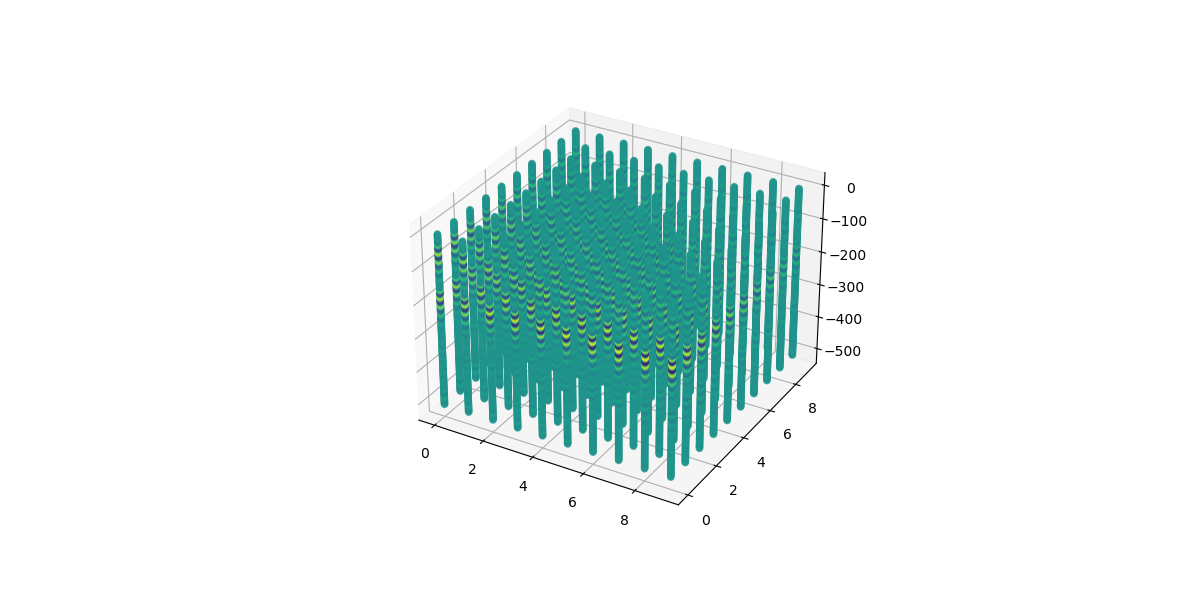

In [9]:
%matplotlib widget
#%matplotlib inline

# 3D plot
fig = plt.figure(figsize = (12, 6))
ax = plt.axes(projection="3d")

ax.scatter3D(xx, yy, zz, c = A_true[::stepsize, :, :], alpha=0.6, marker='o')
plt.show()


In [10]:
## Example code for animation

run_example = False

if run_example == True:

    fig, ax = plt.subplots()


    def f(x, y):
        return np.sin(x) + np.cos(y)

    x = np.linspace(0, 2 * np.pi, 120)
    y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

    # ims is a list of lists, each row is a list of artists to draw in the
    # current frame; here we are just animating one artist, the image, in
    # each frame
    ims = []
    for i in range(60):
        x += np.pi / 15.
        y += np.pi / 20.
        im = ax.imshow(f(x, y), animated=True)
        if i == 0:
            ax.imshow(f(x, y))  # show an initial one first
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                    repeat_delay=1000)
    
    # To save the animation, use e.g.
    #
    # ani.save("movie.mp4")
    #
    # or
    #
    # writer = animation.FFMpegWriter(
    #     fps=15, metadata=dict(artist='Me'), bitrate=1800)
    # ani.save("movie.mp4", writer=writer)
    
    plt.show()

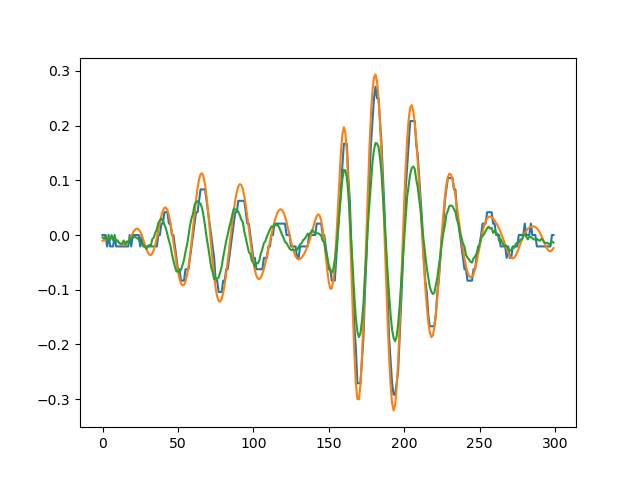

In [11]:
plt.figure()
plt.plot(A_true[:300, -1, 2])
plt.plot(A_fk[:300, -1, 2])
plt.plot(A_idw[:300, -1, 2])

In [70]:
ani_dtype = 'fk'

if ani_dtype == 'true':
    data = A_true
elif ani_dtype == 'smp':
    data = A_smp
elif ani_dtype == 'idw':
    data = A_idw
elif ani_dtype == 'fk':
    data = A_fk


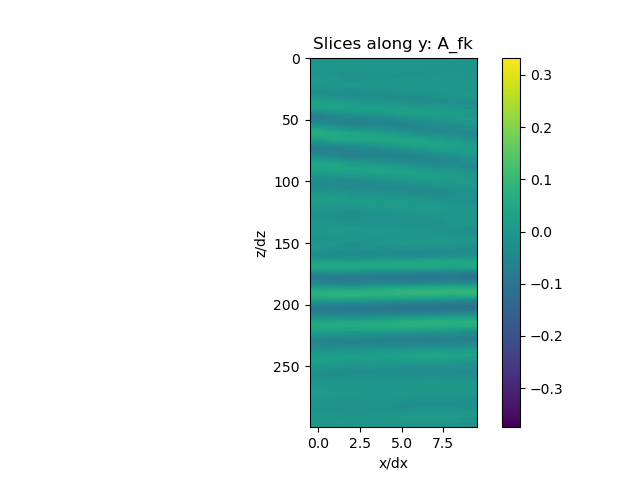

In [71]:
%matplotlib widget

# Animate B-Scans

fig, ax = plt.subplots(nrows = 1, ncols = 1)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []

for timestep in range(10):
    # Choose the current frame
    y = timestep%10
    im = ax.imshow(data[:300, :, y], vmin = vmin, vmax = vmax, animated=True)
    
    # Add the current frame
    ims.append([im])

# Adjust the aspect ratio (AFTER imshow!!!)
ax.set_aspect(dz/dx)

# Other figure settings
ax.set_title('Slices along y: A_{}'.format(ani_dtype))
ax.set_xlabel('x/dx')
ax.set_ylabel('z/dz')
# Color bar
fig.colorbar(im, ax=ax)

# Animate: interval determines the playback speed
# duration [ms] = interval [ms] * number of frames 
ani1 = animation.ArtistAnimation(fig, ims, interval=1500, blit=False,
                                repeat_delay=0.01)

# Save
ani1.save('animation/bscans_{}.mp4'.format(ani_dtype))

plt.show()

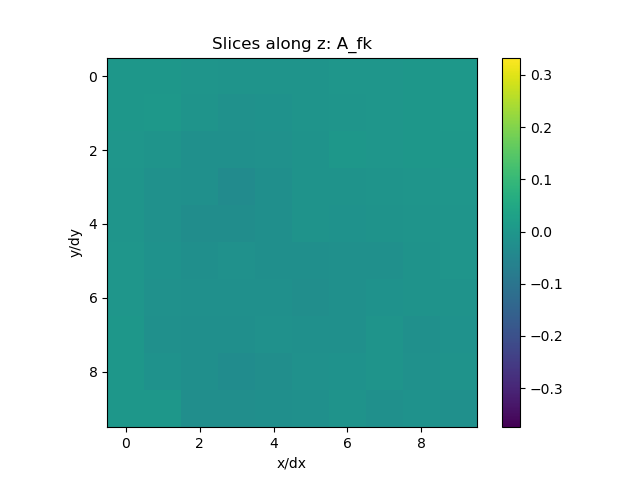

In [46]:
%matplotlib widget


# Animate C-Scans
fig, ax = plt.subplots(nrows = 1, ncols = 1)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []

for timestep in range(300):
    # Choose the current frame
    z = timestep%300
    im = ax.imshow(data[z, :, :], vmin = vmin, vmax = vmax, animated=True)

    # Add the current frame
    ims.append([im])

# Adjust the aspect ratio (AFTER imshow!!!)
ax.set_aspect(1)

# Other figure settings
ax.set_title('Slices along z: A_{}'.format(ani_dtype))
ax.set_xlabel('x/dx')
ax.set_ylabel('y/dy')
# Color bar
fig.colorbar(im, ax=ax)

# Animate: interval determines the playback speed
# duration [ms] = interval [ms] * number of frames
ani2 = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=0)

# Save
ani2.save('animation/cscans_{}.mp4'.format(ani_dtype))


plt.show()

In [72]:
plt.close('all')